caci paycheck
==

comparing 2013 to 2021 as output area reference identifiers do not match on prior paycheck datasets which have an unfamiliar looking id

## spatial data

In [12]:
# get wards, oa, lsoa etc
%run "0.0-lbth-spatial-datasets.ipynb"

In [20]:
# use 2011 geometries for oa
oa = gpd.read_file('../data/external/lbth_oa11.geojson')

In [1]:
import pandas as pd
import geopandas as gpd

In [51]:
# these datasets are available on sharepoint only and are not version controlled
df13 = pd.read_excel('../data/external/lbth -Equivalised Paycheck directory 2013.xlsx', sheet_name='Output Areas', skiprows=11)
df21 = pd.read_excel('../data/external/lbth -Equivalised Paycheck directory 2021.xlsx', sheet_name='OA', skiprows=8)

In [52]:
# trim to relvant columns
oa_paycheck13 = df13[['Output Area','Median Income']]
oa_paycheck21 = df21[['Area ID','Median Income']]

In [53]:
# spatialise data
gdf13 = oa.merge(oa_paycheck13, left_on='OA11CD', right_on='Output Area')
gdf21 = oa.merge(oa_paycheck21, left_on='OA11CD', right_on='Area ID')

<AxesSubplot:>

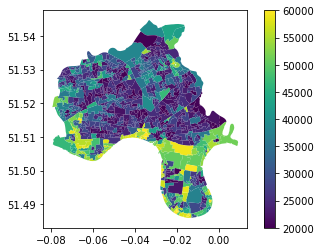

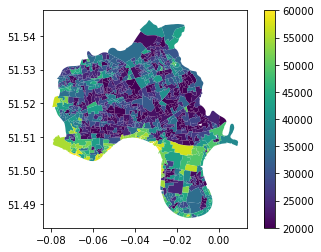

In [54]:
# vis data
gdf13.plot(column='Median Income', legend=True, vmin=20000, vmax=60000)
gdf21.plot(column='Median Income', legend=True, vmin=20000, vmax=60000)



In [74]:
# desc stats
df13['Median Income'].describe(), df21['Median Income'].describe()

(count      747.000000
 mean     32608.230254
 std      12210.162174
 min          0.000000
 25%      23219.000000
 50%      27898.000000
 75%      40646.500000
 max      62012.000000
 Name: Median Income, dtype: float64,
 count      745.000000
 mean     30811.838220
 std      11171.535720
 min      12779.739272
 25%      21883.667180
 50%      27538.209607
 75%      38769.397765
 max      61147.416413
 Name: Median Income, dtype: float64)

<AxesSubplot:ylabel='Frequency'>

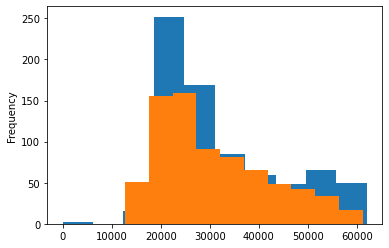

In [66]:
# histogram, oh ... looks like people earned more in 2013 than 2021
df13['Median Income'].plot.hist()
df21['Median Income'].plot.hist()


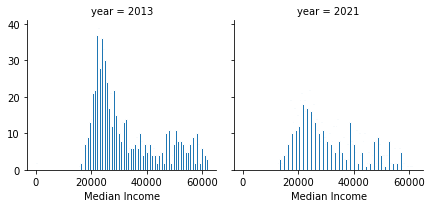

In [140]:
# join tables for faceting
df13['Area ID'] = df13['Output Area']
df13['year']='2013'
cols = ['year']
df13 = df13.ffill(axis=0)

df21['year']='2021'
cols = ['year']
df21 = df21.ffill(axis=0)
df = pd.concat([
  df13[['Area ID','Median Income', 'year']],
  df21[['Area ID','Median Income', 'year']]
  ]
)

# importing packages
import seaborn
import matplotlib.pyplot as plt
  
# Form a facetgrid using columns with a hue
# graph = seaborn.FacetGrid(df, col ="year", hue='year')
graph = seaborn.FacetGrid(df, col ="year")
# map the above form facetgrid with some attributes
graph.map(plt.hist,"Median Income", edgecolor ="w", bins=100).add_legend()
# show the object
plt.show()